# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = r"data/Iris_Data.csv"

## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [2]:
data_frame = pd.read_csv(data_path)

print(f"Número de linhas: \t{data_frame.shape[0]}")
print(f"Número de colunas: \t{data_frame.shape[1]}\n")
print(f"Nome das colunas:")

# fiz o laço para remover o dtype do Index data_frame.columns, já
# que ele não era pedido pelo exercício
for column_name in data_frame.columns.base: # type = pandas.core.indexes.base.Index
  print(column_name, end = ";\t")

# pelo mesmo motivo, também removi o dtype da Series data_frame.dtypes
print(f"\n\nTipos das colunas:")
for key in data_frame.dtypes.keys(): # type = pandas.core.series.Series
  print(f"{key}: {data_frame.dtypes[key]}", end = ";\t")

Número de linhas: 	150
Número de colunas: 	5

Nome das colunas:
sepal_length;	sepal_width;	petal_length;	petal_width;	species;	

Tipos das colunas:
sepal_length: float64;	sepal_width: float64;	petal_length: float64;	petal_width: float64;	species: object;	

## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

In [3]:
# data_frame['species'] = data_frame.species.str.replace('(Iris-)', '')
data_frame['species'] = data_frame.species.apply(lambda input_str: input_str.replace('Iris-', ''))
# data_frame['species'] = data_frame.species.apply(lambda input_str, to_remove='Iris-', to_input='': input_str.replace(to_remove, to_input))
data_frame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

In [4]:
print("Quantidade de cada espécie:")

# assim como no exercício 01, criei o loop para remover o Name e o dtype da Serie 
for key in data_frame.species.value_counts().keys():
  print(f"{key}: {data_frame.species.value_counts()[key]}")

print("\nEstatísticas sobre a massa de dados:")

# gerando quantiles mais precisos
df_stats = data_frame.describe([x * 0.1 for x in range(1, 10)])

# removendo linhas que o exercício não pede para facilitar visualização
df_stats = df_stats.drop(['count', 'std'])

# calculando a faixa
max_row = df_stats.loc['max']
min_row = df_stats.loc['min']
faixa = max_row - min_row

# inserindo a faixa no data frame de estatísticas
faixa.name = "faixa"
df_stats = df_stats.append(faixa)

# mostrando o data frame tratado apenas com o dados relevantes (pedidos pelo exercício)
df_stats

Quantidade de cada espécie:
setosa: 50
versicolor: 50
virginica: 50

Estatísticas sobre a massa de dados:


,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
min,4.300000,2.000,1.000000,0.100000
10%,4.800000,2.500,1.400000,0.200000
20%,5.000000,2.700,1.500000,0.200000
30.0%,5.270000,2.800,1.700000,0.400000
40%,5.600000,3.000,3.900000,1.160000
50%,5.800000,3.000,4.350000,1.300000
60.0%,6.100000,3.100,4.640000,1.500000
70%,6.300000,3.200,5.000000,1.800000
80%,6.520000,3.400,5.320000,1.900000


## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [5]:
grouped_df = data_frame.groupby(['species'])
grouped_df.agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

[Text(0,0.5,'Width'), Text(0.5,0,'Length'), Text(0.5,1,'Sepal Dimensions')]

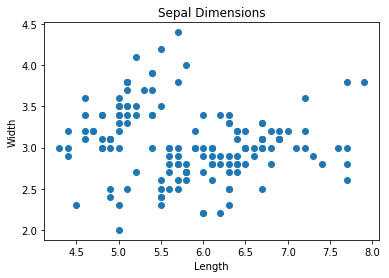

In [6]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(data_frame.sepal_length, data_frame.sepal_width, ls = '', marker = 'o')
ax.set(xlabel = 'Length', ylabel = 'Width', title = 'Sepal Dimensions')

## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

[Text(0,0.5,'Number of specimens'),
 Text(0.5,0,'Length'),
 Text(0.5,1,'Petal Length')]

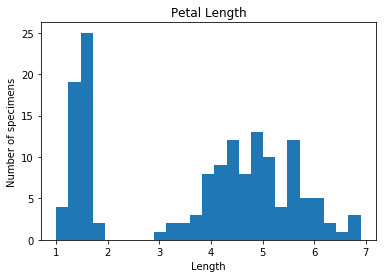

In [12]:
fig, ax = plt.subplots()
ax.hist(data_frame.petal_length, bins = 25)
ax.set(xlabel = 'Length', ylabel = 'Number of specimens', title = 'Petal Length')

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

Text(0.5,0,'Units')

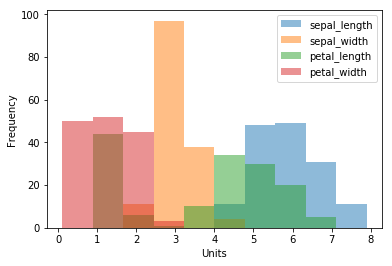

In [8]:
data_frame.plot.hist(alpha = 0.5).set_xlabel('Units')

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

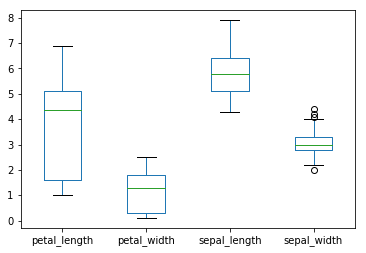

In [9]:
data_frame[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']].plot.box()

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

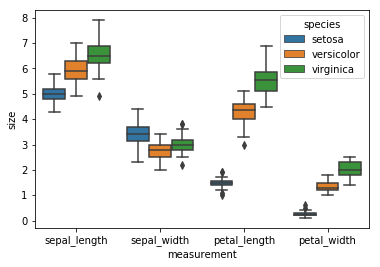

In [10]:
new_data_frame = pd.melt(data_frame, id_vars = ['species'], value_name = 'size', var_name = 'measurement')
sns.boxplot(data = new_data_frame, hue = 'species', x = 'measurement', y = 'size')

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.

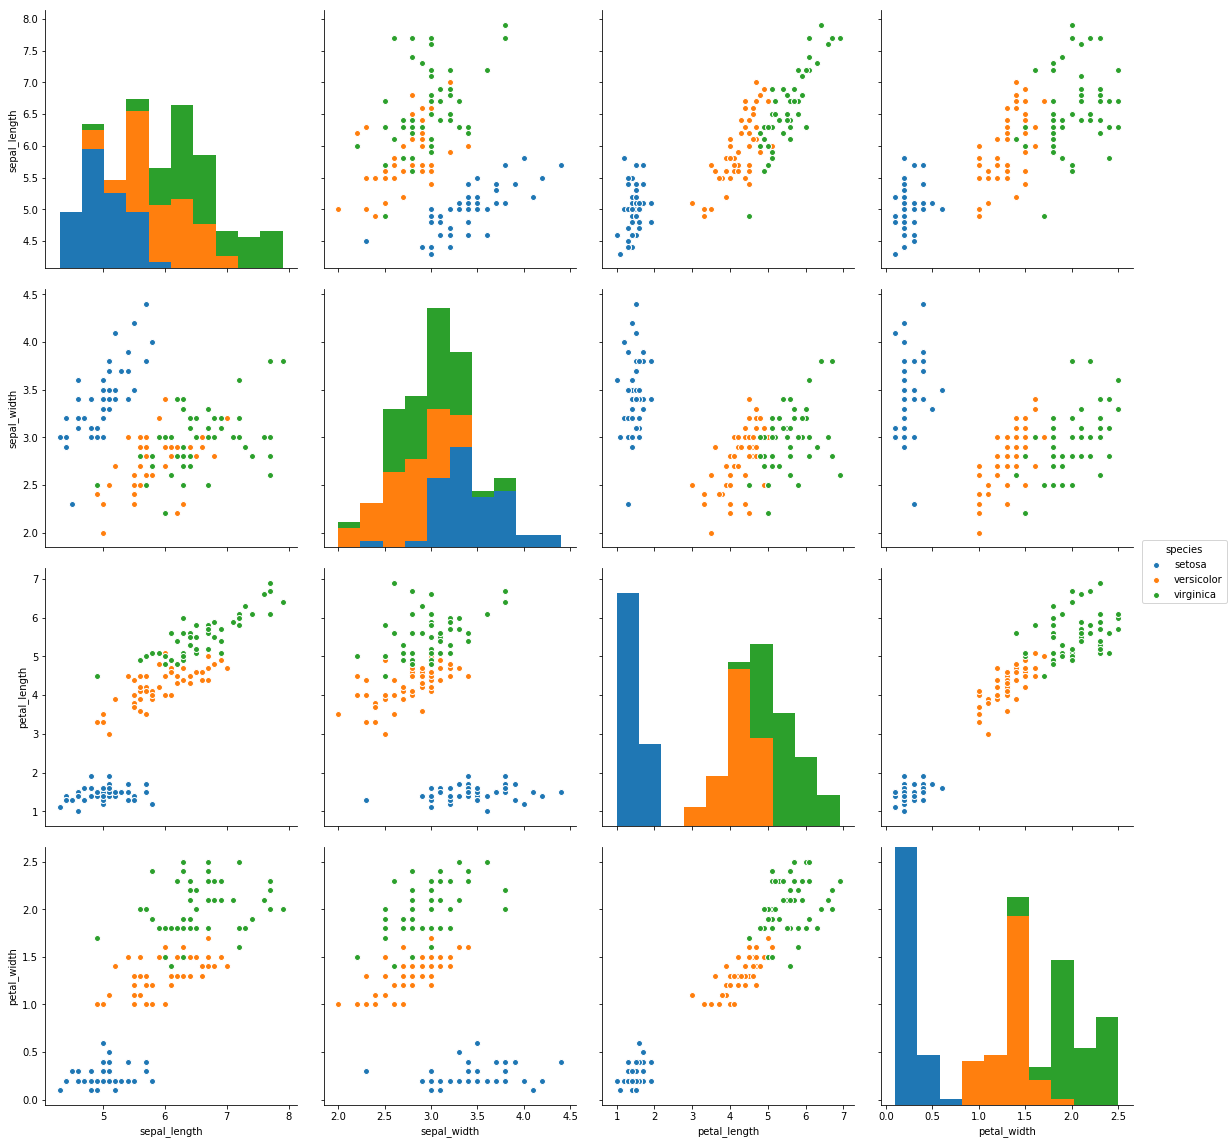

In [11]:
sns.pairplot(data_frame, hue = 'species', size = 4)